## Multiclass Classification
When number of classes are more than 2, the problem becomes multiclass classification. In this notebook, we use R. A. Fisher's Iris Flowers dataset as a three-class classification problem.

### Problem Statement
Given 4 diffferent properites of the Iris flowers, can you create a predictive model to predict their types.

### Attribute Information
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa,Iris Versicolour,Iris Virginica

### Let's have look at the data!

In [88]:
import pandas as pd
import numpy as np
np.random.seed(42)

df = pd.read_csv('iris.data.csv')
print(df.shape)
print(df.info())
df.head()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sepal length in cm   150 non-null    float64
 1   sepal width in cm    150 non-null    float64
 2   petal length in cm   150 non-null    float64
 3   petal width in cm    150 non-null    float64
 4   class                150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Is there any missing data?
Remeber this code from Ensemble notebook?

In [89]:
total = df.isnull().sum().sort_values(ascending=False)

percent_1 = df.isnull().sum()/df.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head(10)

,Total,%
sepal length in cm,0,0.0
sepal width in cm,0,0.0
petal length in cm,0,0.0
petal width in cm,0,0.0
class,0,0.0


So, there is no missing data. Great!!!  

All attributes are numeric. But we need to change class names to numbers.
We did this with Counter for Titanic dataset. Let's do the same here!

In [90]:
from collections import Counter
c = Counter(df['class'])
print(c)

Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})


Wow. The dataset is balanced perfectly.

Let's get index of class names in our Counter as the numberic value of each class. Let's also reshuffle the dataset.

In [92]:
df['class_num'] = df['class'].apply(lambda x: list(c.keys()).index(x))
df = df.sample(frac=1).reset_index()
df.head()

,level_0,index,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class,class_num
0,84,77,6.7,3.0,5.0,1.7,Iris-versicolor,1
1,20,29,4.7,3.2,1.6,0.2,Iris-setosa,0
2,45,81,5.5,2.4,3.7,1.0,Iris-versicolor,1
3,47,137,6.4,3.1,5.5,1.8,Iris-virginica,2
4,149,102,7.1,3.0,5.9,2.1,Iris-virginica,2


In [94]:
# Sanity Check
print(Counter(df['class_num']))

Counter({1: 50, 0: 50, 2: 50})


Now, we can drop the old index and class field. We can use our Counter to revert back to class names. We will see an example of this after we trained and tested our model.

In [95]:
df = df.drop(['index','class'],axis = 1)
df.head()

,level_0,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class_num
0,84,6.7,3.0,5.0,1.7,1
1,20,4.7,3.2,1.6,0.2,0
2,45,5.5,2.4,3.7,1.0,1
3,47,6.4,3.1,5.5,1.8,2
4,149,7.1,3.0,5.9,2.1,2


In [96]:
df = df.drop(['level_0'],axis=1)

In [97]:
df.columns

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm ',
       'petal width in cm ', 'class_num'],
      dtype='object')

### Machine Learning Starts Here!
First, we separate input data from output.

In [98]:
df_y = df[['class_num']]
df_x = df.drop(['class_num'],axis=1)
print(df_x.shape,df_y.shape)

(150, 4) (150, 1)


Second, we separate training and testing sets.

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_x,df_y, test_size=0.2,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


Third, we train a simple decision tree

In [103]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=42)

clf = clf.fit(X_train,y_train)

Forth, we evaluate the tree

In [104]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_train_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train,y_train_pred)
print('Train Accuracy:',round(train_acc * 100,2))

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print('Accuracy:',round(acc*100,2))
print('Confusion Matrix:')
print(cm)

Train Accuracy: 100.0
Accuracy: 100.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Simple sanity check shows how good our model is.

In [105]:
print(Counter(y_test['class_num']))

Counter({2: 11, 0: 10, 1: 9})


The trained tree can be ploted as usual.

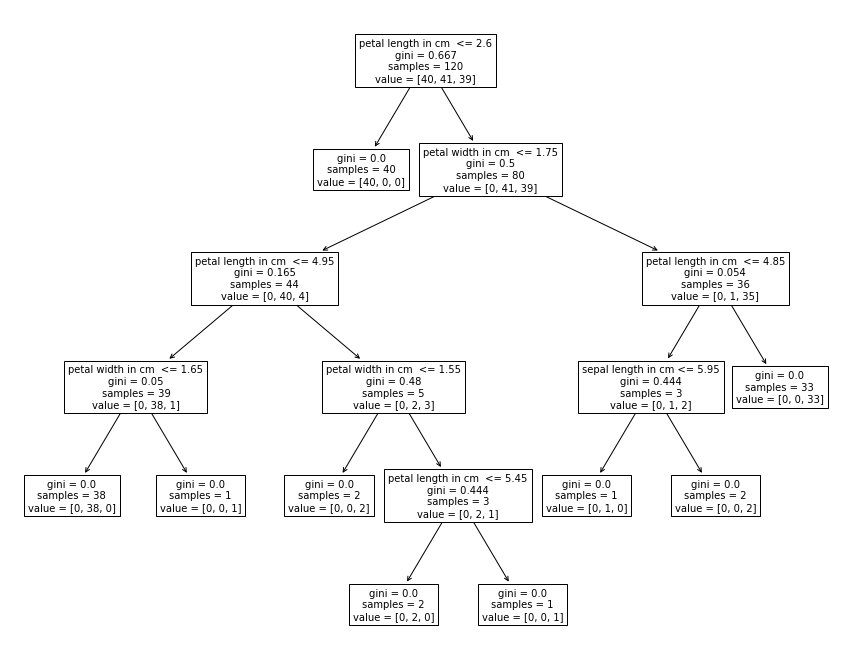

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10,feature_names = list(df.columns[:-1]))
plt.show()

#### Can we get the rules from the tree?  
Let's print the tree and see.

In [107]:
# From stackoverflow
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, round(threshold,4)))
            recurse(tree_.children_left[node], depth + 2)
            print("{}else:  # if {} > {}".format(indent, name, round(threshold,4)))
            recurse(tree_.children_right[node], depth + 2)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 2)
    
tree_to_code(clf,list(df.columns[:-1]))

def tree(sepal length in cm, sepal width in cm, petal length in cm , petal width in cm ):
    if petal length in cm  <= 2.6:
        return [[40.  0.  0.]]
    else:  # if petal length in cm  > 2.6
        if petal width in cm  <= 1.75:
            if petal length in cm  <= 4.95:
                if petal width in cm  <= 1.65:
                    return [[ 0. 38.  0.]]
                else:  # if petal width in cm  > 1.65
                    return [[0. 0. 1.]]
            else:  # if petal length in cm  > 4.95
                if petal width in cm  <= 1.55:
                    return [[0. 0. 2.]]
                else:  # if petal width in cm  > 1.55
                    if petal length in cm  <= 5.45:
                        return [[0. 2. 0.]]
                    else:  # if petal length in cm  > 5.45
                        return [[0. 0. 1.]]
        else:  # if petal width in cm  > 1.75
            if petal length in cm  <= 4.85:
                if sepal length in cm <= 5.95:
       

### Prediction Function
Now, we are ready to create a predictor function that gives predictions.

In [109]:
def predict(clf,x):
    return list(c.keys())[clf.predict(x)[0]]

print(predict(clf,[list(df_x.iloc[10])]))

Iris-virginica


### Linear separability
It seems two of the features are really important: petal length and petal width. Lets plot them together.

In [110]:
part_df = df[['petal length in cm ','petal width in cm ','class_num']]
part_df.columns = ['length','width','class']
part_df.head()

,length,width,class
0,5.0,1.7,1
1,1.6,0.2,0
2,3.7,1.0,1
3,5.5,1.8,2
4,5.9,2.1,2


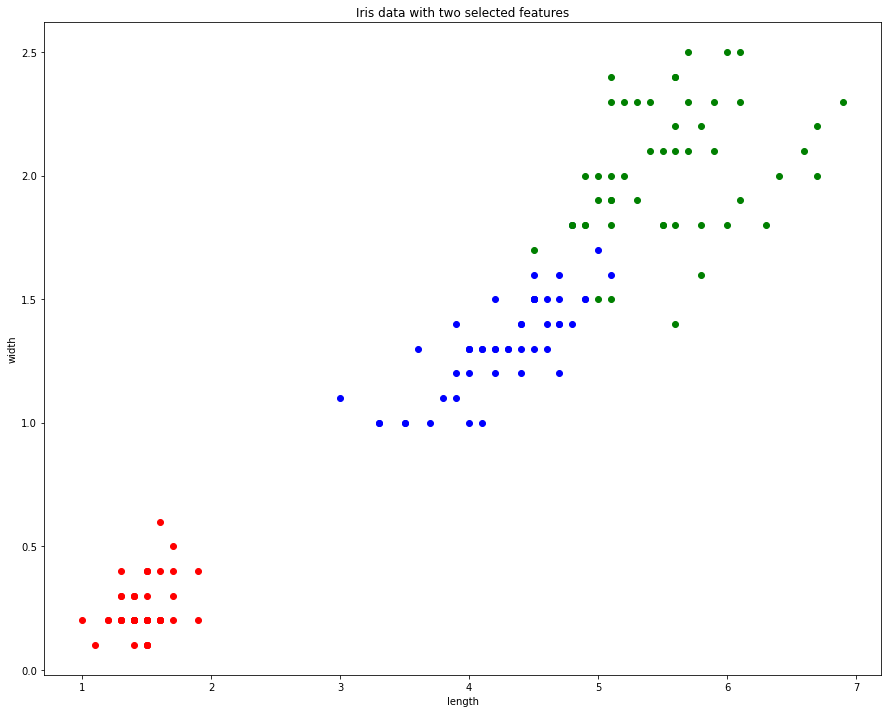

In [111]:
#'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50
df0 = part_df[part_df['class'] == 0]
df1 = part_df[part_df['class'] == 1]
df2 = part_df[part_df['class'] == 2]

plt.figure(figsize=(15,12))
plt.scatter(df0['length'], df0['width'], c='red')
plt.scatter(df1['length'], df1['width'], c='blue')
plt.scatter(df2['length'], df2['width'], c='green')
plt.title('Iris data with two selected features')
plt.xlabel('length')
plt.ylabel('width')
#plt.savefig('ScatterPlot_05.png')
plt.show()